In [171]:
import pandas as pd

pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas.*")
%matplotlib inline

In [172]:
nba_df = pd.read_csv('nba_stats_22-23.csv')
nba_df = nba_df.rename(columns={"Unnamed: 0": "ID"})
nba_df.columns = [col.replace(" ", "") for col in nba_df.columns]
nba_df

,ID,PlayerName,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TotalMinutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.656,0.564,0.248,2.3,16.8,9.7,30.0,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.498,0.322,0.334,2.1,11.4,6.8,35.3,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.513,0.289,0.317,4.7,16.5,10.8,38.6,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.583,0.309,0.268,3.7,20.8,12.5,33.5,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.677,0.267,0.387,1.2,19.5,10.5,24.5,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,0.304,0.8,3.0,0.250,1.0,2.8,0.364,0.370,0.0,0.3,0.000,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,89,4.0,0.363,0.522,0.043,3.8,15.6,9.7,5.9,1.1,5.0,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,0.167,0.2,1.0,0.200,0.0,0.2,0.000,0.250,0.4,0.4,1.000,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,28,9.0,0.363,0.833,0.333,3.7,11.7,7.6,21.8,0.0,6.2,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,0.381,2.0,6.0,0.333,0.7,1.0,0.667,0.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,56,11.8,0.548,0.857,0.095,0.0,11.9,5.9,12.3,1.7,0.0,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,0.500,2.0,5.0,0.400,4.0,7.0,0.571,0.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,35,15.5,0.621,0.417,0.167,9.9,18.8,14.4,29.0,0.0,2.4,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


In [173]:
nba_df2 = pd.read_csv('nba_stats_23-24.csv')
nba_df2 = nba_df2[["Age",
    "GP",
    "TRB",
    "AST",
    "PTS",
    "BLK",
    "TS%",
    "Salary"
    ]]

nba_df2 = nba_df2[nba_df2['GP'] >= 20]
nba_df2 = nba_df2.dropna(subset=['Salary'])
# Also drop rows where SALARY is 0.0
nba_df2 = nba_df2[nba_df2['Salary'] > 0.0]

total_missing = nba_df2.isnull().sum().sort_values(ascending=False)
percent_missing = (nba_df2.isnull().sum() / nba_df.isnull().count()).sort_values(ascending=False)

missing_data_df = pd.concat([total_missing, percent_missing], axis=1, keys=["Total Missing", "Percent Missing"])
missing_data_df.head(8)
nba_df2

,Age,GP,TRB,AST,PTS,BLK,TS%,Salary
0,25.0,70,9.2,9.8,33.9,0.5,0.617,40064220.0
1,25.0,75,5.5,6.2,30.1,0.9,0.636,33386850.0
2,29.0,73,11.5,6.5,30.4,1.1,0.649,45640084.0
3,27.0,77,3.6,6.7,28.7,0.2,0.592,26346666.0
4,29.0,79,12.4,9.0,26.4,0.9,0.650,47607350.0
...,...,...,...,...,...,...,...,...
431,24.0,24,1.3,1.2,3.0,0.1,0.492,1761752.0
448,21.0,32,0.5,0.2,1.6,0.2,0.593,1719864.0
449,20.0,20,0.9,0.2,2.4,0.1,0.382,3712920.0
475,21.0,22,2.3,0.6,1.5,0.9,0.623,1761752.0


In [174]:
nba_df.columns

Index(['ID', 'PlayerName', 'Salary', 'Position', 'Age', 'Team', 'GP', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'TotalMinutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [175]:
total_missing = nba_df.isnull().sum().sort_values(ascending=False)
percent_missing = (nba_df.isnull().sum() / nba_df.isnull().count()).sort_values(ascending=False)

missing_data_df = pd.concat([total_missing, percent_missing], axis=1, keys=["Total Missing", "Percent Missing"])
missing_data_df.head(8)

,Total Missing,Percent Missing
FT%,23,0.049251
3P%,13,0.027837
2P%,4,0.008565
TS%,1,0.002141
3PAr,1,0.002141
FTr,1,0.002141
eFG%,1,0.002141
FG%,1,0.002141


In [176]:
cols_to_fill_zero = [
    "FT%",
    "3P%",
    "2P%",
    "TS%",
    "3PAr",
    "FTr",
    "eFG%",
    "FG%",
]

for col in cols_to_fill_zero:
    nba_df[col] = nba_df[col].fillna(0)

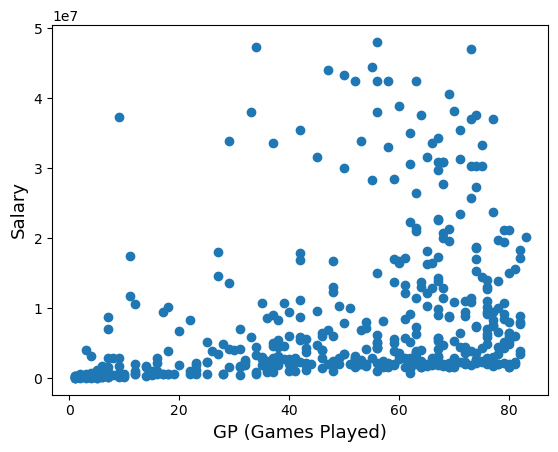

In [177]:
fig, ax = plt.subplots()
ax.scatter(x=nba_df["GP"], y=nba_df["Salary"])
plt.ylabel("Salary", fontsize=13)
plt.xlabel("GP (Games Played)", fontsize=13)
plt.show()

In [178]:
nba_df = nba_df[nba_df['GP'] >= 20]


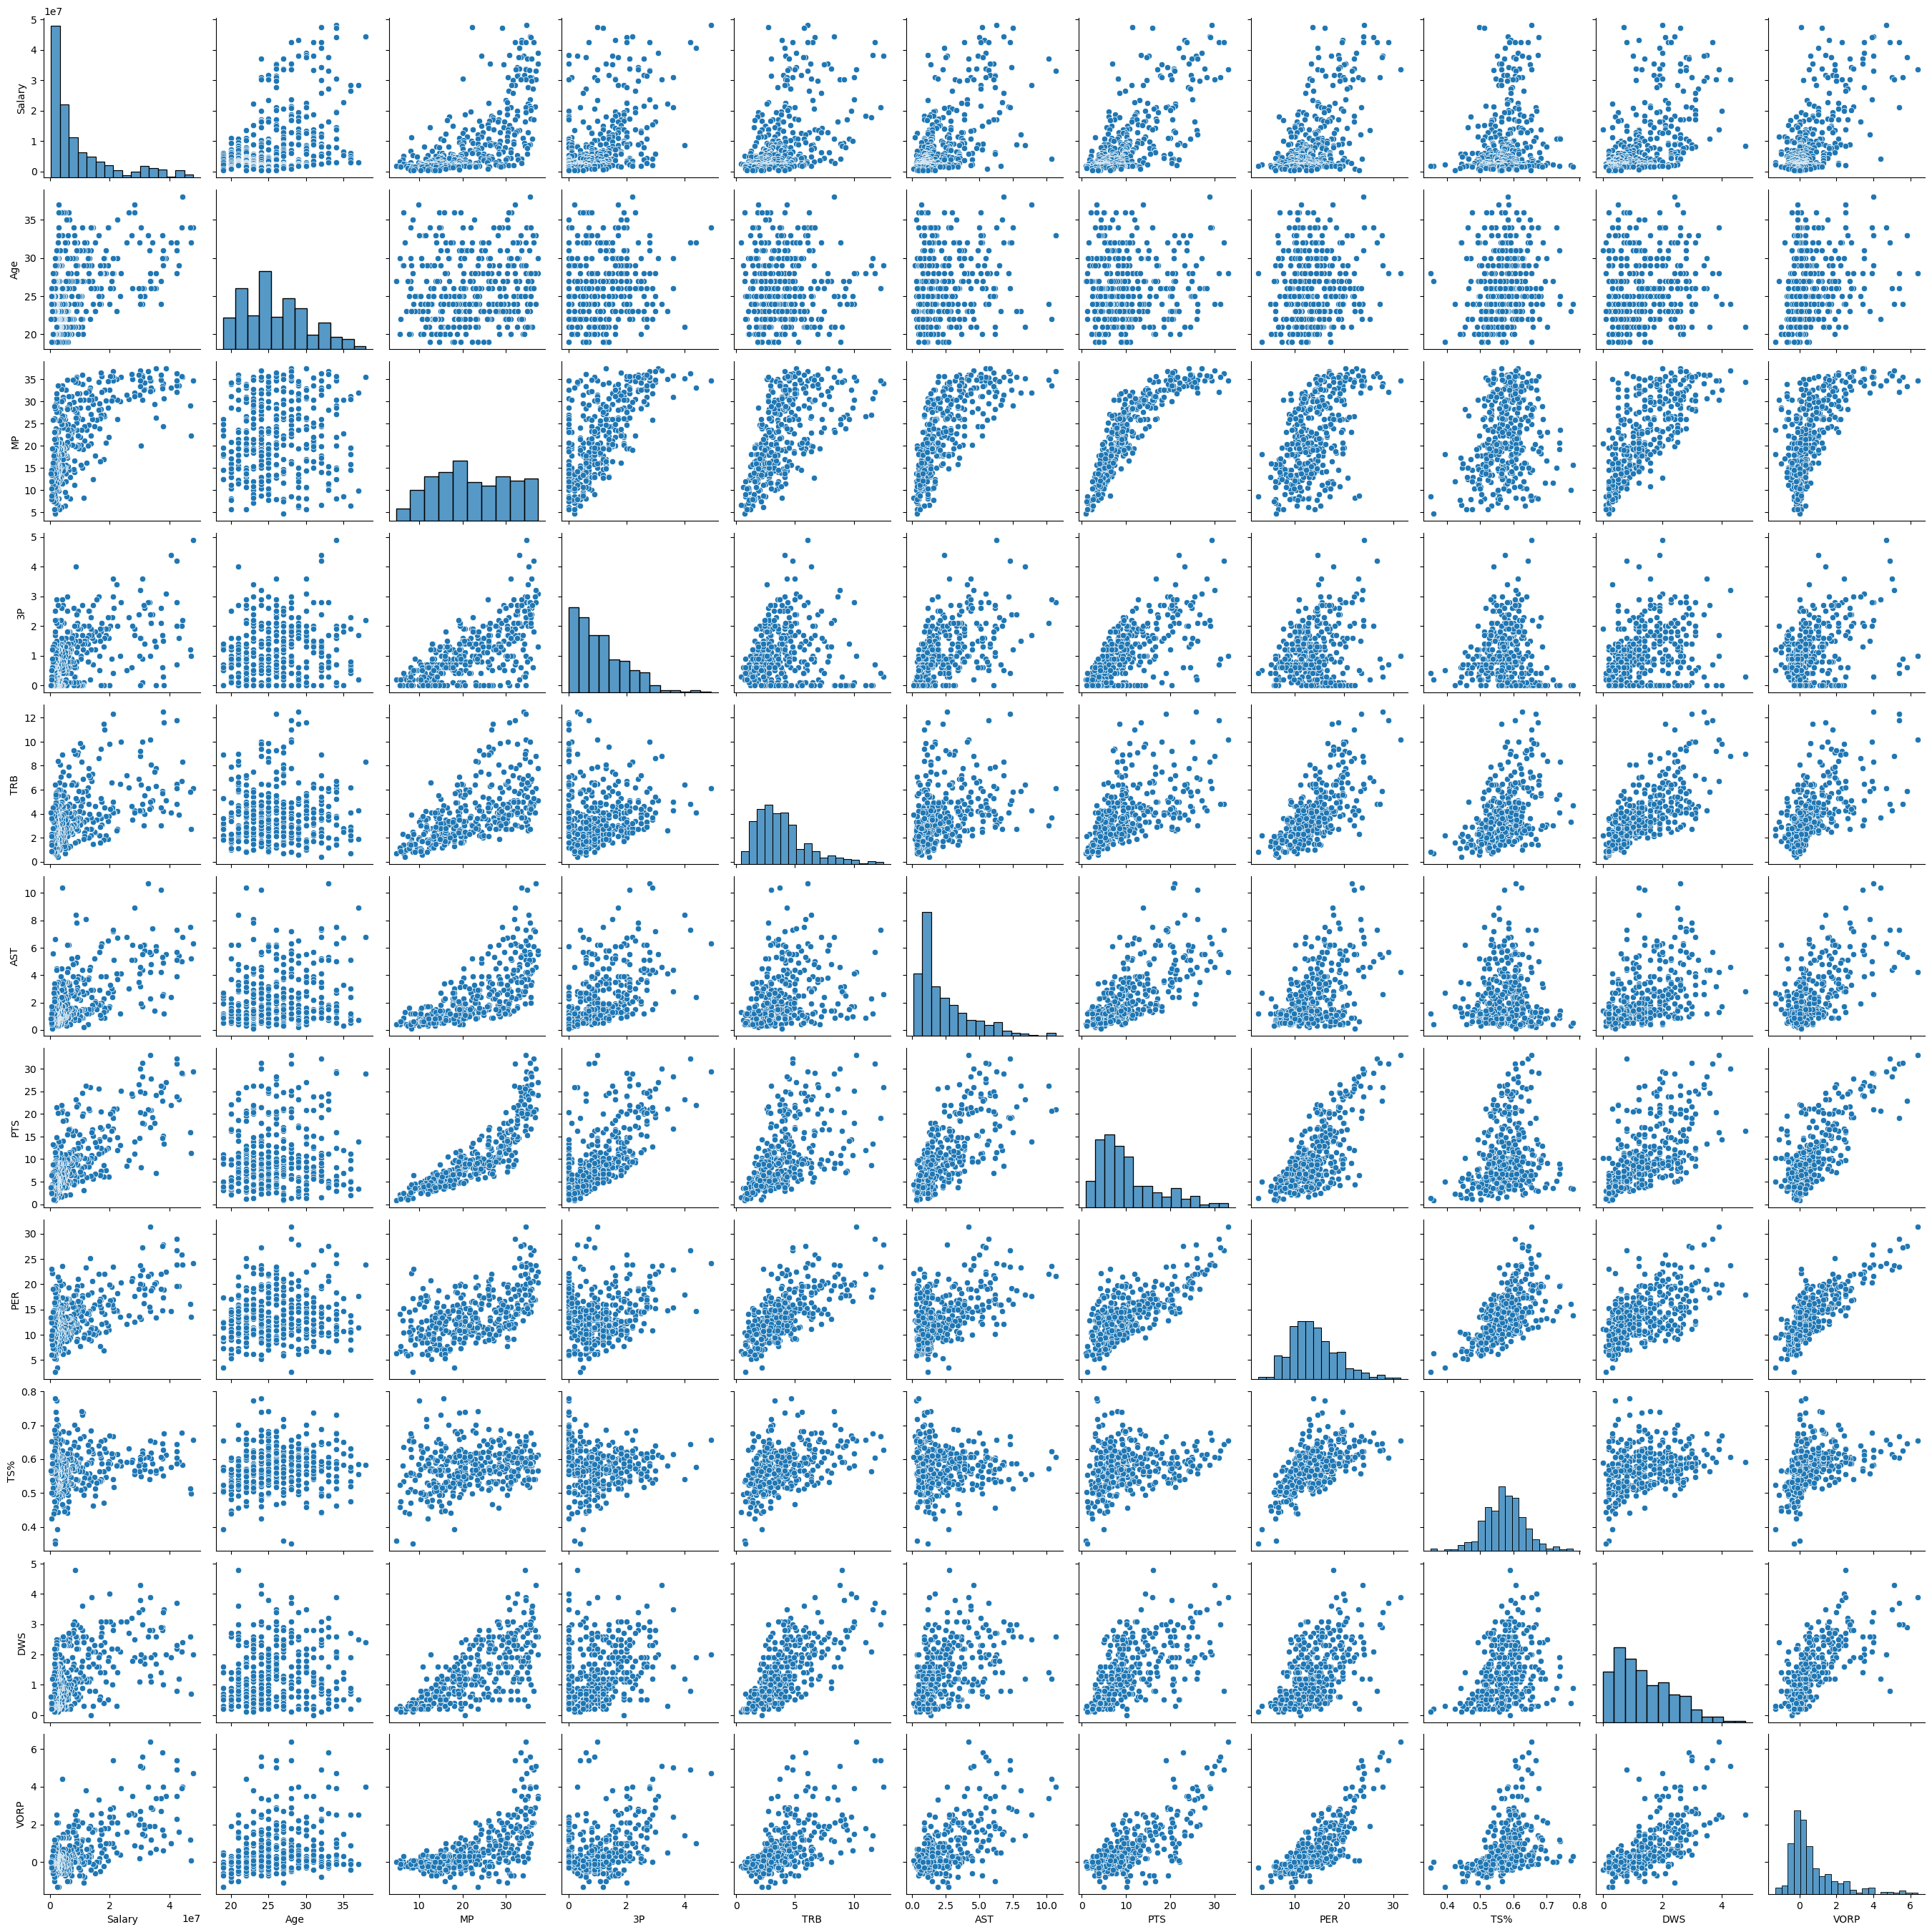

In [179]:
# scatterplot
cols = [
    "Salary",
    "Age",
    "MP",
    "3P",
    "TRB",
    "AST",
    "PTS",
    "PER",
    "TS%",
    "DWS",
    "VORP"
]
sns.pairplot(nba_df[cols], size=2.5)
plt.show();

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [181]:
X = nba_df[["Age",
    "MP",
    "3P",
    "TRB",
    "AST",
    "PTS",
    "PER",
    "TS%",
    "DWS",
    "VORP"]]
y = nba_df["Salary"]
    

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 512)

In [183]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [184]:
lm.score(X_train, y_train)

0.6988129219582437

In [185]:
import statsmodels.api as sm

In [186]:
# You may also simply add a column using code below to create the DataFrame with a constant
X_train['const'] = 1
X_train.head()

,Age,MP,3P,TRB,AST,PTS,PER,TS%,DWS,VORP,const
134,28,23.5,0.8,2.9,2.9,5.6,11.5,0.588,2.6,1.2,1
387,19,12.5,0.6,1.8,0.5,3.1,7.4,0.566,0.5,-0.1,1
45,33,36.2,0.6,4.6,5.1,24.5,20.6,0.592,3.2,2.6,1
149,22,29.8,2.6,4.6,1.2,12.2,12.3,0.597,1.7,0.8,1
13,31,24.3,1.5,4.2,4.9,15.1,17.4,0.551,1.0,0.6,1


In [187]:
# Fit a model using OLS 
model = sm.OLS(y_train, X_train)
model_results = model.fit()

In [188]:
# Return the summary tables of the regression results
model_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS                  Adj. R-squared:         0.688     
Dependent Variable:     Salary               AIC:                    9658.9174 
Date:                   2025-03-21 15:10     BIC:                    9698.9783 
No. Observations:       282                  Log-Likelihood:         -4818.5   
Df Model:               10                   F-statistic:            62.88     
Df Residuals:           271                  Prob (F-statistic):     8.80e-65  
R-squared:              0.699                Scale:                  4.2282e+13
-------------------------------------------------------------------------------
          Coef.         Std.Err.      t    P>|t|      [0.025         0.975]    
-------------------------------------------------------------------------------
Age     1032254.3166    99573.8743 10.3667 0.0000    836217.6228   1228291.0103
MP      -225481.9358   176154.8741 -1.2800 0.2016   -572287.9564    121324.0848
3P      -704281.9080   802380.5861 -0.8777 0.3809  -2283973.7529    875409.9369
TRB      879524.5343   359973.0396  2.4433 0.0152    170825.3398   1588223.7288
AST      716731.7128   424113.9967  1.6900 0.0922   -118245.3959   1551708.8215
PTS     1195924.3209   208263.3116  5.7424 0.0000    785904.6112   1605944.0306
PER     -252415.9681   260331.1714 -0.9696 0.3331   -764944.6054    260112.6692
TS%    -4623968.8527 10682278.6332 -0.4329 0.6655 -25654772.3578  16406834.6524
DWS     -181486.0032   839378.9305 -0.2162 0.8290  -1834018.5723   1471046.5659
VORP     545900.8400   763807.6876  0.7147 0.4754   -957850.3675   2049652.0476
const -22458210.4233  5170679.4580 -4.3434 0.0000 -32638018.2530 -12278402.5937
-------------------------------------------------------------------------------
Omnibus:                  29.420            Durbin-Watson:               1.961 
Prob(Omnibus):            0.000             Jarque-Bera (JB):            49.687
Skew:                     0.616             Prob(JB):                    0.000 
Kurtosis:                 4.646             Condition No.:               1168  
===============================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [189]:
def adjust_salary(salary, years):
    """
    Adjusts the player's salary based on their income.
    - Superstars (> $15M) get 9% annual growth.
    - Role players (≤ $15M) get 25% annual growth.

    Returns:
    - float: Adjusted salary.
    """
    if salary > 15_000_000:
        annual_growth_rate = 0.05  # Superstars
    else:
        annual_growth_rate = 0.15  # Role players

    adjusted_salary = salary * ((1 + annual_growth_rate) ** years)
    return round(adjusted_salary, 2)

years_forward = 2

nba_df["Salary"] = nba_df["Salary"].apply(lambda x: adjust_salary(x, years_forward))

years_forward = 1

nba_df2["Salary"] = nba_df2["Salary"].apply(lambda x: adjust_salary(x, years_forward))

combined_data = pd.concat([nba_df[["Age", "GP", "TRB", "AST", "PTS", "BLK", "TS%", "Salary"]], nba_df2], axis=0)

X2 = combined_data[["Age",
    "GP",
    "TRB",
    "AST",
    "PTS",
    "BLK",
    "TS%",
    ]]

y = combined_data["Salary"]

combined_data

,Age,GP,TRB,AST,PTS,BLK,TS%,Salary
0,34.0,56,6.1,6.3,29.4,0.4,0.656,52997190.44
1,32.0,34,2.7,5.2,11.4,0.4,0.498,52198700.40
2,34.0,73,5.8,7.5,15.9,0.5,0.513,51905897.35
3,38.0,55,8.3,6.8,28.9,0.6,0.583,49033674.27
4,34.0,47,6.7,5.0,29.1,1.4,0.677,48642129.11
...,...,...,...,...,...,...,...,...
431,24.0,24,1.3,1.2,3.0,0.1,0.492,2026014.80
448,21.0,32,0.5,0.2,1.6,0.2,0.593,1977843.60
449,20.0,20,0.9,0.2,2.4,0.1,0.382,4269858.00
475,21.0,22,2.3,0.6,1.5,0.9,0.623,2026014.80


In [190]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y,
                                                    test_size = 0.25,
                                                    random_state = 512)

In [191]:
lm2 = LinearRegression()
lm2.fit(X2_train,y_train)

LinearRegression()

In [192]:
lm2.score(X2_train, y_train)

0.7307387219001

In [193]:
X2_train['const'] = 1
X2_train.head()

,Age,GP,TRB,AST,PTS,BLK,TS%,const
10,32.0,69,4.1,2.4,21.9,0.4,0.576,1
99,29.0,66,4.8,1.5,8.3,0.5,0.523,1
288,21.0,59,1.7,0.9,5.1,0.2,0.565,1
240,31.0,76,3.1,2.1,5.6,0.2,0.574,1
190,21.0,80,4.1,3.5,18.6,0.2,0.589,1


In [194]:
model = sm.OLS(y_train, X2_train)
model_results = model.fit()
model_results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                 Adj. R-squared:        0.727     
Dependent Variable:      Salary              AIC:                   16756.0709
Date:                    2025-03-21 15:10    BIC:                   16789.6098
No. Observations:        489                 Log-Likelihood:        -8370.0   
Df Model:                7                   F-statistic:           186.5     
Df Residuals:            481                 Prob (F-statistic):    1.14e-132 
R-squared:               0.731               Scale:                 4.3854e+13
------------------------------------------------------------------------------
          Coef.        Std.Err.      t    P>|t|      [0.025         0.975]    
------------------------------------------------------------------------------
Age     1136669.9888   75320.3815 15.0911 0.0000    988672.3564   1284667.6212
GP       -48288.3162   20276.6040 -2.3815 0.0176    -88129.9809     -8446.6515
TRB      352218.0625  209780.4316  1.6790 0.0938    -59981.2203    764417.3453
AST      553984.9710  236463.6790  2.3428 0.0195     89355.5577   1018614.3844
PTS     1093989.0338   74660.2724 14.6529 0.0000    947288.4551   1240689.6126
BLK     3087495.0470 1102632.5726  2.8001 0.0053    920923.3033   5254066.7907
TS%    -9772736.9309 5871773.0853 -1.6644 0.0967 -21310231.8028   1764757.9409
const -24570055.0673 3498728.3079 -7.0226 0.0000 -31444734.8828 -17695375.2518
------------------------------------------------------------------------------
Omnibus:                   21.286           Durbin-Watson:              1.987 
Prob(Omnibus):             0.000            Jarque-Bera (JB):           39.233
Skew:                      0.270            Prob(JB):                   0.000 
Kurtosis:                  4.278            Condition No.:              1463  
==============================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [195]:
y_model_pred = lm2.predict(X2_train.iloc[:, 0:7]) # Use X_train2 which is before standardization
y_model_pred

array([ 3.08094101e+07,  1.32406850e+07, -1.77639206e+06,  1.03863336e+07,
        1.40295438e+07,  3.68009675e+07, -2.19798575e+06,  2.29441703e+07,
        3.36110426e+07,  1.47913871e+07,  1.84684433e+07,  1.19595566e+07,
        6.61817840e+06,  1.51379010e+07,  4.48472112e+06,  1.42720702e+07,
        6.53231164e+06,  5.55183854e+06,  3.40350203e+06,  2.79745683e+07,
        3.59838844e+06,  1.38550489e+07,  7.32312601e+06,  3.40979524e+07,
        5.68235143e+06,  3.77118004e+06,  2.55984470e+07,  3.89560738e+06,
        3.02297189e+06,  4.70033126e+07,  4.53028177e+06,  1.41430623e+07,
        1.44428689e+06,  3.17544492e+07,  9.78349640e+06,  1.09008203e+07,
        2.74304322e+06,  6.78110096e+05, -3.02229958e+06,  1.85360397e+04,
        2.83791078e+07,  9.65303382e+06, -4.41308943e+05,  3.18462579e+07,
        1.59059141e+06,  1.21488386e+07,  4.10338147e+06,  3.33571225e+05,
        1.39716822e+07,  1.97892919e+07,  1.97748646e+07,  1.07695657e+07,
        1.38778250e+07,  

In [196]:
results = pd.DataFrame({'Actual': y_train, 'Predicted': y_model_pred})
results['residuals'] = results['Actual'] - results['Predicted']
results.head()

,Actual,Predicted,residuals
10,44761588.20,3.080941e+07,1.395218e+07
99,17112948.98,1.324068e+07,3.872264e+06
288,1977843.60,-1.776392e+06,3.754236e+06
240,10837449.35,1.038633e+07,4.511158e+05
190,6954075.30,1.402954e+07,-7.075469e+06


In [197]:
# Plot scatter plot of the residuals
plt.scatter(results['Predicted'], results['residuals'],  color='blue')

In [198]:
# Plot histogram of the errors (residuals)
plt.hist(results['residuals'], bins=20)

(array([ 1.,  2.,  2.,  7.,  9., 27., 51., 73., 87., 83., 67., 34., 15.,
        14., 10.,  4.,  1.,  1.,  0.,  1.]),
 array([-23708562.31170866, -21054846.29888151, -18401130.28605436,
        -15747414.2732272 , -13093698.26040005, -10439982.2475729 ,
         -7786266.23474574,  -5132550.22191859,  -2478834.20909144,
           174881.80373572,   2828597.81656287,   5482313.82939002,
          8136029.84221718,  10789745.85504433,  13443461.86787148,
         16097177.88069864,  18750893.89352579,  21404609.90635294,
         24058325.9191801 ,  26712041.93200725,  29365757.94483441]),
 <BarContainer object of 20 artists>)

In [199]:
# Use statistical test such as K-S test to test for normality

from scipy import stats
from scipy.stats import norm, kstest

np.random.seed(500)

# Null hypothesis: distributions are the same
# Alternative hypothesis: distributions are NOT the same

# getting the loc (mean) and scale (std dev) for residuals
loc, scale = norm.fit(results['residuals'])

# create a normal distribution with loc and scale
n = norm(loc=loc, scale=scale)

# perform the KS-test using residuals compared to a normal distribution in the correct scale
stat, p = stats.kstest(results['residuals'], n.cdf)

# print p-value: if p-value is <0.05 (5% significance), then reject null hypothesis 
print('Residuals: Statistics=%.3f, p=%.9f' % (stat, p))

Residuals: Statistics=0.047, p=0.215920292


In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [201]:
for i in range(0,7):
    v = vif(X2_train.values, i)
    print("VIF for {}:{}".format(X2_train.columns[i], round(v, 4)))

VIF for Age:1.0907
VIF for GP:1.2319
VIF for TRB:2.6675
VIF for AST:2.612
VIF for PTS:3.1198
VIF for BLK:2.0156
VIF for TS%:1.3145


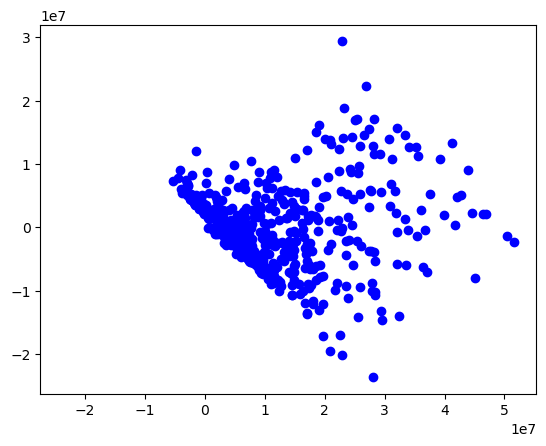

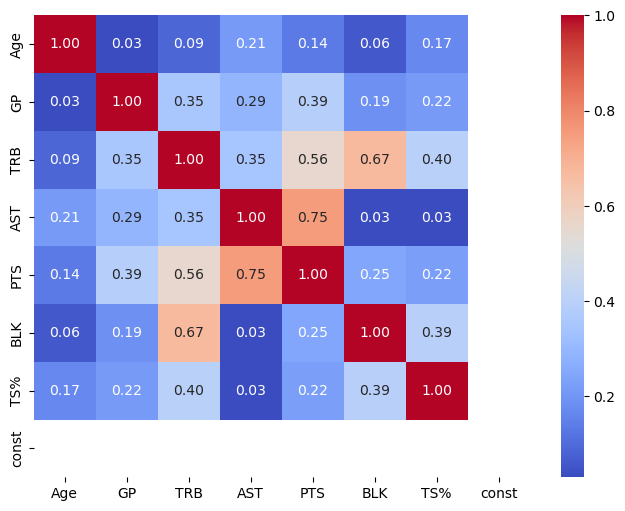

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(X2_train.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [203]:
# Using joblib (recommended)
from joblib import dump, load

# Save the model
dump(lm2, 'linear_regression_model.joblib')

['linear_regression_model.joblib']